# NTDS assignment 2: network models
[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), *PhD student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

For this assignment we will work on a network representing the collaboration between scientists in the field of General Relativity and Quantum Cosmology. The network comes from [SNAP](http://snap.stanford.edu/data/ca-GrQc.html) and is described as follows:

> Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print [arXiv](https://arxiv.org) and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author *i* co-authored a paper with author *j*, the graph contains a undirected edge from *i* to *j*. If the paper is co-authored by *k* authors this generates a completely connected (sub)graph on *k* nodes. The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv.

In [1]:
%matplotlib inline

import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
G = nx.read_edgelist(os.path.join('arxiv_collaboration_network.txt'))

In [3]:
print('My network has {} nodes.'.format(len(G.nodes())))
print('My network has {} edges.'.format(G.size()))

My network has 5242 nodes.
My network has 14496 edges.


## 1. Comparing to model networks

1.1 In this part of the assignment, you have to create an Erdős–Rényi and Barabási-Albert graph using NetworkX, and compare them to the collaboration network. Try to simulate the original network as best as you can. When choosing parameters for the networks, take into account the number of vertices and edges of the original network. The number of vertices should be exactly the same. Comment on your choice of parameters.

In [4]:
seed = 177
N = len(G.nodes())
E = G.size()
p = float(2*E)/((N-1)*N)
m = int(round((N-math.sqrt(N**2-4*E))/2))
er = nx.erdos_renyi_graph(N, p, seed)
ba = nx.barabasi_albert_graph(N, m, seed)

**Your answer here.** <br>
In both cases we can simply chose the number of vertices to be the same as for the collaboration network (N = 5242 nodes). The second parameter of both graphs should be chosen in such a way to reproduce the number of edges of the collaboration network E = 14496 edges. In the case of the Erdős–Rényi network the connection probability p should be chosen as $p = 2E / (N(N-1))$. This comes from the fact that this model will on average produce a fraction p of all $N(N-1)/2$ possible nodes. The exact number of nodes created but the choice of a lucky seed might produce N nodes :) For the Barabási-Albert network the second parameter m defining the number of edges to attach from a new node will lead the algorithm to produce $(N-m)m$ nodes. This means that optimally, m should be chosen as $m = (N-\sqrt{N²-4E})/2$. However since m has to be an integer and this expression will rarely round up, we have to round it to the closest integer to get a number of edges as close as possible to E as possible.

In [5]:
print('My Erdős–Rényi network has {} nodes.'.format(len(er.nodes())))
print('My Erdős–Rényi network has {} edges.'.format(er.size()))
print('My Barabási-Albert network has {} nodes.'.format(len(ba.nodes())))
print('My Barabási-Albert network has {} edges.'.format(ba.size()))

My Erdős–Rényi network has 5242 nodes.
My Erdős–Rényi network has 14496 edges.
My Barabási-Albert network has 5242 nodes.
My Barabási-Albert network has 15717 edges.


1.2 Check the size of the largest connected component in each graph and compare them to the original network. In the Erdős–Rényi model, what should the probability of creating each edge be in order to have the same expected size of the largest component? Justify. Generate a graph with this parameter to check if you indeed get a similar value.

In [6]:
giant_G = max(nx.connected_component_subgraphs(G), key=len)
giant_er = max(nx.connected_component_subgraphs(er), key=len)
giant_ba = max(nx.connected_component_subgraphs(ba), key=len)
print(len(giant_G.nodes()))
print(len(giant_er.nodes()))
print(len(giant_ba.nodes()))

4158
5223
5242


**Your answer here.** <br>
We can see that both giant nodes of the  Erdős–Rényi and the Barabási-Albert network have a giant component of size equal or almost equal to their total number of nodes (which is not the case for the collaboration network). In order to find $p_{giant}$ which will lead to an Erdős–Rényi network with an expected giant component size equal to the giant component size of the collaboration network, we must remind ourselves that the fraction of nodes in the giant component $N_G / N = S = 1-e^{-\langle k \rangle S} = 1-e^{-p(N-1)S}$, where p can be isolated to get: <br>

$p = -\frac{ln(1-S)}{S(N-1)}$ <br>

We can now insert the desired values of the variable in the upper equation to find $p_{giant} \approx 0.00038$ and test this new connection probability by creating a new Erdős–Rényi network and ask for the size of its giant component. Doing this lead to a giant component of size 4160, which is satisfyingly close to the target size of 4158.

In [7]:
S=float(len(giant_G.nodes()))/N
p_giant=-math.log(1-S)/(S*(N-1))
print('The parameter p for an Erdős–Rényi network with the same expected size of the giant component is {}.'.format(p_giant))

er_g = nx.erdos_renyi_graph(N, p_giant, seed)
er_giant = max(nx.connected_component_subgraphs(er_g), key=len)
print('The size of the component in a randomly generated network with this parameter is {}.'.format(len(er_giant.nodes())))

The parameter p for an Erdős–Rényi network with the same expected size of the giant component is 0.000379111572025.
The size of the component in a randomly generated network with this parameter is 4160.


1.3 Look at the clustering coefficient of the original network. Is there a network model we talked about that could have a clustering coefficient that is close? Explain.

In [8]:
nx.average_clustering(G)

0.5296358110521363

**Your answer here.** <br>
Since the collaboration network is all but random and the connectivity is subject to local proximity effect, we do not expect the Erdős–Rényi or the Barabási-Albert networks to have clustering coefficients close to the clustering coefficient of the collaboration nework. If we test this hypothesis, we can indeed observe that the clustering coefficients of the Erdős–Rényi and the Barabási-Albert networks will be several orders of magnitude smaller than the clustering coefficient of the collaboration nework. This can be explained by the fact that if person A has had collaborations with person B and person C than the probability that person B and C have collaborated together is higher than the probability of any two random persons of the network to have collaborated together. The same is not true for the Erdős–Rényi and the Barabási-Albert networks, which will have a similar or equal probability of connection in those two cases and will therefore have a much smaller clustering coefficient.

In [10]:
print nx.average_clustering(ba)
print nx.average_clustering(er)

0.00833659123425
0.000699723890805


## 2. Creating a network with a predefined degree distribution

In this part of the assignment, you will have to create a random network from a predefined degree distribution. There are several network models which can create a random network with the exact same degree distribution as the original, or with the same expected distribution as the original. Refer to section 4.8 of [the Barabási book](http://networksciencebook.com) for more information.

One of the most famous ones is the configuration model. The model for a graph with $L$ edges in total is constructed in the following steps:

- Assign a degree to each node, represented as stubs (half-links). The degree sequence is either generated analytically from a preselected distribution, or it is extracted from the adjacency matrix of a real network. Note that we must start from an even number of stubs to avoid being left with unpaired stubs.
- Randomly select a stub pair and connect them. Then randomly choose another pair from the remaining $2L - 2$ stubs and connect them. This procedure is repeated until all stubs are paired up.

*Reminder:* A stub is a half-link, representing the half of an edge. It contains one node and can be paired up with another stub to create an edge (between the two corresponding nodes).

2.1 However, this model allows for the creation of multi-links (multiple edges between the same pair of vertices) and self-loops, thus leading to a non-simple graph. In this assignment, you will implement a greedy configuration model, to avoid these problems.

The algorithm goes as follows:
- Extract the degree sequence from our collaboration network.
- Assign a target degree to each node, represented as stubs or half-links. Use the degree sequence extracted from the collaboration network.
- Sort the nodes by degree. 
    - Pick the node with the highest target degree. Delete all its stubs from the list of stubs to make sure we don't create a self loop.
    - Until all its weighted degree equals its target degree: 
        - Randomly select one stub from the list of stubs (corresponding to one of the other nodes), and connect these two nodes. In case the two chosen nodes are already connected, simply increase the weight of this edge by one. Be careful to randomly select from stubs and not from nodes, as this means the chances of selecting a node will be proportional to its target degree.
    - When the number of edges adjacent to this node corresponds to its target degree, go on to the second node in the list. 
    - Repeate this procedure until all stubs are paired up, or there is only one node left with a pair number of stubs. In that case, don't create a self-loop, but discard the stubs.
    
*Hints*: 
 - Use `nx.empty_graph()` to create an empty graph.
 - Use `G.add_edge(node1,node2,weight = 1)` to add an edge to a weighted graph.
 - Use `G.edge[node1][node2]['weight'] += 1` to increment the weight of an edge by one.

In [11]:
def greedy_configuration(degree_distribution):
    n = len(degree_distribution)
    stubs = []
    for node in range(0,n):
        for s in range(0, degree_distribution[node]):
            stubs += [node]
    
    G = nx.empty_graph(n)
    for node1 in range(0,n):
        if node1 in stubs and not all(x == stubs[0] for x in stubs):
            indices = [i for i, x in enumerate(stubs) if x != node1]
            degree = len(stubs)-len(indices)
            stubs = [stubs[i] for i in indices]
            for d in range(0,degree):
                node2index = np.random.randint(0,len(stubs))
                node2 = stubs[node2index]
                del stubs[node2index]
                if G.has_edge(node1, node2):
                    G.edge[node1][node2]['weight'] += 1
                else:
                    G.add_edge(node1, node2, weight = 1)
            
    return G

In [12]:
degree_distribution=sorted(nx.degree(G).values(),reverse=True) # degree distribution sorted from highest to lowest
gc = greedy_configuration(degree_distribution)

In [13]:
print("The new network has {} nodes".format(len(gc.nodes())))

The new network has 5242 nodes


2.2 Verify that the networks have the same number of nodes. Plot the difference between the weighted degree distributions to verify that they are identical. If not, why?

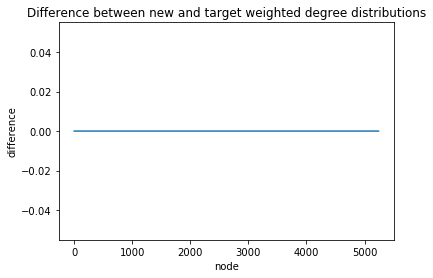

In [14]:
degree_sequence_gc=sorted(nx.degree(gc, weight = 'weight').values(),reverse=True) #weighted degree distribution
plt.plot([x - y for x, y in zip(degree_distribution, degree_sequence_gc)])
plt.xlabel('node')
plt.ylabel('difference')
plt.title('Difference between new and target weighted degree distributions')

**Your answer here.** <br>
The new network has the same number of nodes as the collaboration network and the two weighted degree distributions are identical. It would have been possible that the new network could have less edges on one node, if the edge pairing algorithm would have been left in the end with a pair number of stubs for the last node to connect. Fortunately, this wasn't the case in this execution.

2.3 Should these two networks have the same adjacency matrices? Justify.

**Your answer here.** <br>
In this case we only showed that the sum of the rows of the adjacency matrices are the same in both cases (since the matrices are symmetric this will also be true for the sum of the columns). There is however no reason to believe that each element should be the same; even considering any permutations of indices. For one it would be possible that the sum of the row of the last node who's edge were created might not be equal to the sum of the row of that same node in the collaboration adjacency matrix for the reason described in 2.2. Another obvious reason to not believe that they are the same is that the adjacency matrix of the original collaboration network exclusively consists of 1 and 0 while the adjacency of the new network might have elements equal to 2,3 or some higher integer. Finally, even if the sum of all rows were equal between matrices and both only consisted of 0 and 1, this would still not imply that they would be equal since numerous different interconnectivity configurations could meet these same conditions.

2.4 Draw both the generated and original networks. Are they similar? If not, why? Try to explain.

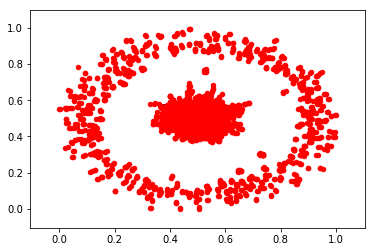

In [21]:
nx.draw_networkx(G,with_labels=False,node_size=20)

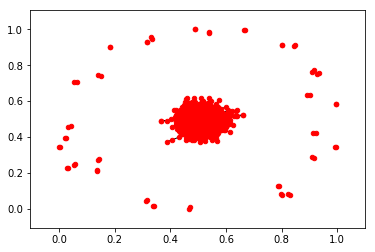

In [22]:
nx.draw_networkx(gc,with_labels=False,node_size=20)

**Your answer here.** <br>
They are similar in the sense that they both consist of one major giant component and several other disconnected components. The main difference however is that the main component of the generated network is quite bigger the the one of the original network. One possible explanation for that is that in the collaboration network, people who have very little collaborations have a higher than random probability to have collaborated with other people with very little collaborations. This might be because people with low impact publications might have not continued to publish in many collaborations and that was the case for most of the collaborators of those low impact publications. This would explain why the original network has more small components and a smaller giant component as one would expect from the generated network.

2.5 Do you expect the properties studied in the first part of the assignment to be close to the original graph? Justify.

**Your answer here.** <br>
The number of nodes should be precisely the same. <br>
The number of edges should be precisely the same or very slightly smaller for the generated network. <br>
However for the size of the giant component and the clustering factor there is no reason to believe that these should be similar between networks. In the case of the clustering factor, one would even expect that it should be again several orders of magnitude smaller since the random edge creation didn't take into account any local effect from existing connectivity. For the size of the giant component one could however argue that since in this case the degree distribution was also reproduced, it should be at least closer to the size of the giant component of the original collaboration network than the sizes of the giant components for the Erdős–Rényi and the Barabási-Albert networks. This doesn't mean that the expected size of that giant component of the new network should be equal to the size of the giant component of the origianl collaboration network however and this is confirmed by the plots of the graphs above.
